<a href="https://colab.research.google.com/github/jushih/unit-8-machine-learning/blob/master/Mini_Project_Tree_Based_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Tree-Based Algorithms

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an amazing resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also because it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
# Your code here! :)

df = pd.read_csv('gdrive/My Drive/Colab Notebooks/GermanCredit.csv')
df.head(10)

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0
5,36,9055,2,4,35,1,2,0,1,Good,...,0,0,1,0,0,1,0,1,0,0
6,24,2835,3,4,53,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0
7,36,6948,2,2,35,1,1,0,1,Good,...,0,0,1,1,0,0,0,0,0,1
8,12,3059,2,4,61,1,1,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
9,30,5234,4,2,28,2,1,1,1,Bad,...,0,0,1,0,1,0,0,0,0,1


In [7]:
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


In [17]:
df.Class.value_counts()

Good    700
Bad     300
Name: Class, dtype: int64

In [0]:
import numpy as np

# convert class to binary
df['Class'] = np.where(df['Class'] == 'Good', 1, 0)

In [0]:
# separate Y and X variables
target = df.Class
data = df.drop(['Class'], axis=1)

# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.30)


decision_tree_classifier = DecisionTreeClassifier(random_state=0)
parameter_grid = {'max_depth': np.arange(3, 15),
                  'max_features': np.arange(1, 10)}

cross_validation = ShuffleSplit(n_splits = 10, test_size = 0.30)

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(X_train.values, y_train.values)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.6995238095238095
Best params: {'max_depth': 3, 'max_features': 7}


In [0]:
optimized_clf = grid_search.best_estimator_

In [90]:
optimized_clf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.70      0.15      0.25        92
           1       0.72      0.97      0.83       208

   micro avg       0.72      0.72      0.72       300
   macro avg       0.71      0.56      0.54       300
weighted avg       0.71      0.72      0.65       300



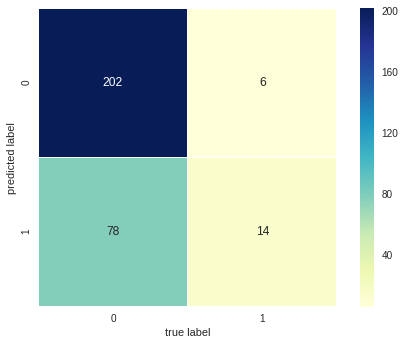

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true, y_pred = y_test, optimized_clf.predict(X_test)
print(classification_report(y_true, y_pred))

mat = confusion_matrix(y_true, y_pred, labels=[1,0])

sns.heatmap(mat, square=True, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [92]:
print("Accuracy on training set: {:.3f}".format(optimized_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(optimized_clf.score(X_test, y_test)))

Accuracy on training set: 0.724
Accuracy on test set: 0.720


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [29]:
! pip install dtreeviz

  Stored in directory: /root/.cache/pip/wheels/4c/3f/87/b2c828617d1bd181145fbaf41129e4c82fa8d9a98082701e00
Successfully built dtreeviz


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

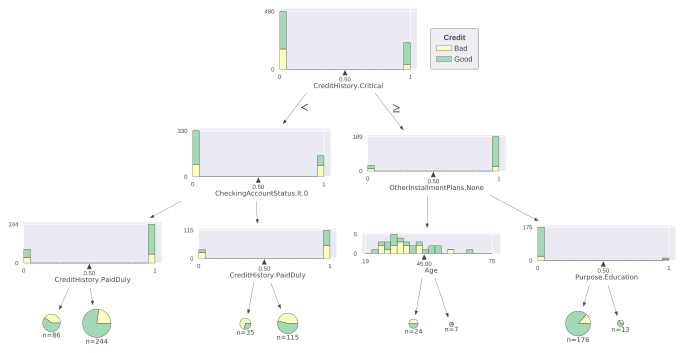

In [93]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *


viz = dtreeviz(optimized_clf,
               X_train.values,
               y_train.values,
               target_name='Credit',
               feature_names = X_train.columns,
                class_names=["Bad","Good"])
              
viz              

In [0]:
# save the model to disk
filename = '/content/gdrive/My Drive/Springboard/tree.sav'
pickle.dump(optimized_clf, open(filename, 'wb'))

# Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is not so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [67]:
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}

In [71]:
random_classifier = RandomForestClassifier()

cross_validation = ShuffleSplit(n_splits = 3, test_size = 0.30)

grid_search2 = GridSearchCV(random_classifier, 
                            param_grid = random_grid,
                            cv = cross_validation, 
                            verbose=1,
                            n_jobs = 5)

grid_search2.fit(X_train.values, y_train.values)

print ("Best Score: {}".format(grid_search2.best_score_))
print ("Best params: {}".format(grid_search2.best_params_))

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   14.9s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   59.3s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  6.4min
[Parallel(n_jobs=5)]: Done 1620 out of 1620 | elapsed:  8.6min finished


Best Score: 0.7682539682539683
Best params: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [72]:
grid_search2.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [0]:
optimal_rf = grid_search2.best_estimator_

In [95]:
optimal_rf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.86      0.34      0.48        92
           1       0.77      0.98      0.86       208

   micro avg       0.78      0.78      0.78       300
   macro avg       0.82      0.66      0.67       300
weighted avg       0.80      0.78      0.74       300



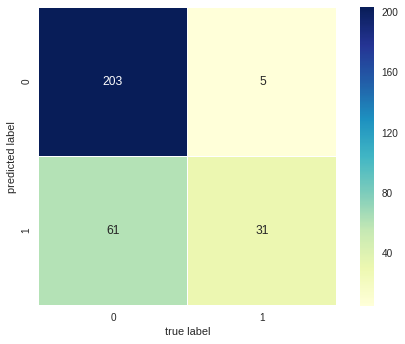

In [96]:
y_true, y_pred = y_test, optimal_rf.predict(X_test)
print(classification_report(y_true, y_pred))

mat = confusion_matrix(y_true, y_pred, labels=[1,0])

sns.heatmap(mat, square=True, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [97]:
print("Accuracy on training set: {:.3f}".format(optimal_rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(optimal_rf.score(X_test, y_test)))

Accuracy on training set: 0.963
Accuracy on test set: 0.780


In [0]:
# save the model to disk
filename = '/content/gdrive/My Drive/Springboard/rf.sav'
pickle.dump(optimal_rf, open(filename, 'wb'))


In [99]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
  
  
#base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
#base_model.fit(train_features, train_labels)
base_accuracy = evaluate(optimized_clf, X_test, y_test)


best_random = random_search.best_estimator_
random_accuracy = evaluate(optimal_rf, X_test, y_test)


#print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2800 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 0.2200 degrees.
Accuracy = -inf%.


# Find Important Features

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model.

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [81]:
optimal_rf.best_estimator_.feature_importances_

array([7.89564398e-02, 1.13548364e-01, 3.32817049e-02, 3.38575602e-02,
       7.59438358e-02, 1.63556530e-02, 1.03133928e-02, 1.72277893e-02,
       2.36542091e-03, 3.78512905e-02, 1.80262448e-02, 7.03771129e-03,
       7.05822924e-02, 1.58384670e-02, 1.54625961e-02, 1.40870783e-02,
       6.63970847e-03, 2.36692977e-02, 2.08342520e-02, 9.24921717e-03,
       1.10974686e-02, 1.23462770e-02, 4.23024487e-04, 1.67880552e-03,
       3.38923027e-03, 0.00000000e+00, 2.89142263e-05, 8.33346317e-03,
       1.43614505e-03, 2.26779908e-02, 8.41484622e-03, 4.04116563e-03,
       2.93532914e-03, 1.72213287e-02, 1.34164538e-02, 1.33950328e-02,
       9.67522025e-03, 1.14988595e-02, 8.32160313e-03, 5.28120935e-03,
       1.40271499e-02, 1.66286447e-02, 6.86151050e-03, 0.00000000e+00,
       7.07171940e-03, 4.32730528e-03, 6.39991300e-03, 1.66261409e-02,
       1.27114747e-02, 1.38160514e-02, 1.68391554e-02, 1.44486755e-02,
       4.64333887e-03, 1.75631957e-02, 9.78351364e-03, 1.56637843e-02,
      

In [83]:
importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': optimal_rf.best_estimator_.feature_importances_
})

importance = importance.sort_values(by='importance', ascending = False)
importance.head()

,feature,importance
1,Amount,0.113548
0,Duration,0.078956
4,Age,0.075944
12,CheckingAccountStatus.none,0.070582
9,CheckingAccountStatus.lt.0,0.037851


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Feature Importance')

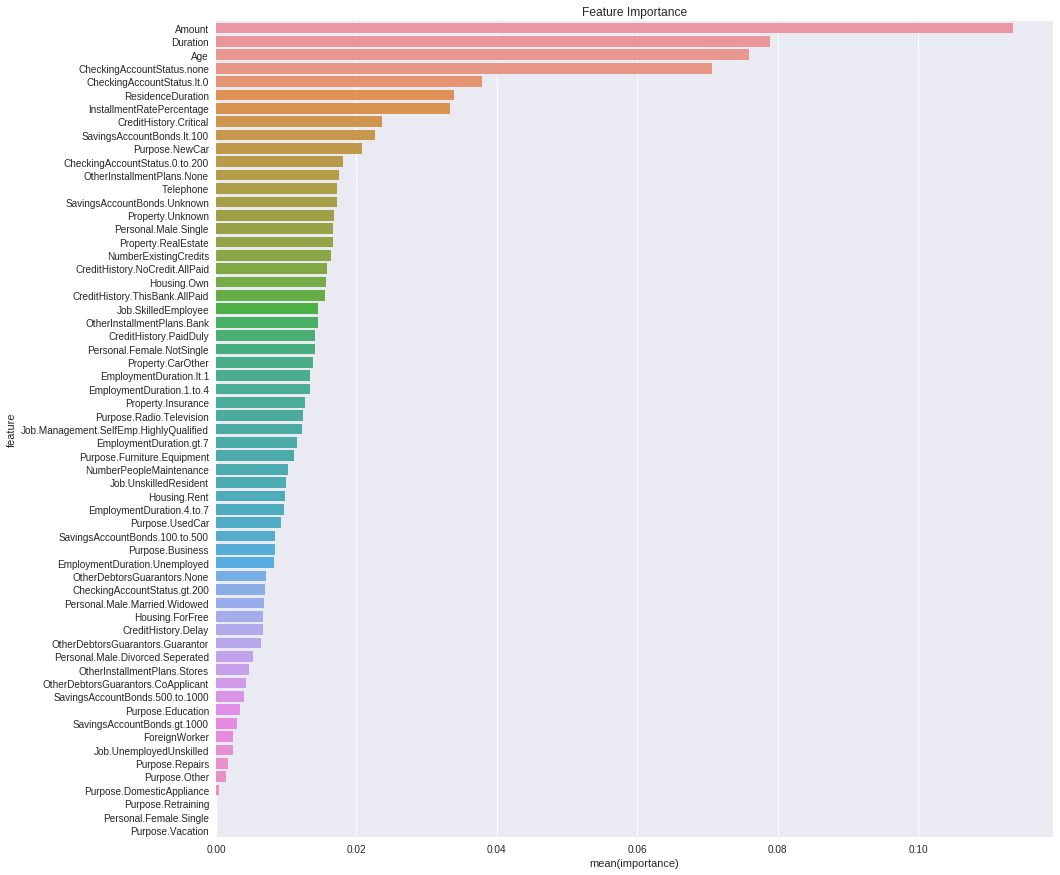

In [84]:
import seaborn as sns


plt.figure(figsize=(15,15))
ax = sns.barplot(x="importance", y="feature", data=importance)
plt.title("Feature Importance")

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex.

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [102]:
! pip install pdpbox

    100% |████████████████████████████████| 57.7MB 373kB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [0]:
import pdpbox
from pdpbox import pdp

# (Optional) Advanced Boosting-Based Algorithms

using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:

* XGBoost: https://xgboost.readthedocs.io/en/latest/
* CatBoost: https://tech.yandex.com/catboost/
* LightGBM: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [163]:
#!conda install -c anaconda py-xgboost
#!conda install -c conda-forge catboost
#!conda install -c conda-forge lightgbm

! pip install catboost

    100% |████████████████████████████████| 60.6MB 645kB/s 


Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

## XGBoost Classifier

In [137]:
from xgboost.sklearn import XGBClassifier

# A parameter grid for XGBoost
xgb_params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }


xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)


cross_validation = ShuffleSplit(n_splits = 3, test_size = 0.30)

grid_search3 = GridSearchCV(xgb, 
                            param_grid = xgb_params,
                            cv = cross_validation, 
                            verbose=1,
                            n_jobs = 2)


grid_search3.fit(X_train.values, y_train.values)

print ("Best Score: {}".format(grid_search3.best_score_))
print ("Best params: {}".format(grid_search3.best_params_))

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   33.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  5.5min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 10.7min
[Parallel(n_jobs=2)]: Done 1215 out of 1215 | elapsed: 17.9min finished


Best Score: 0.7412698412698413
Best params: {'colsample_bytree': 0.6, 'gamma': 2, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.8}


In [140]:
optimal_xgb = grid_search3.best_estimator_
optimal_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=2, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.8)

              precision    recall  f1-score   support

           0       0.74      0.49      0.59        92
           1       0.80      0.92      0.86       208

   micro avg       0.79      0.79      0.79       300
   macro avg       0.77      0.71      0.72       300
weighted avg       0.78      0.79      0.78       300



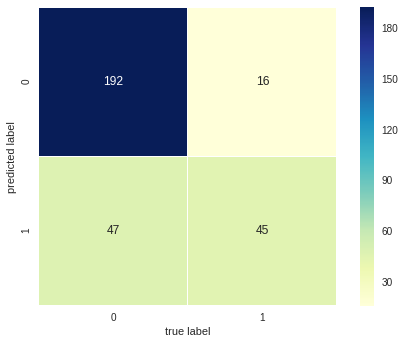

Accuracy on training set: 0.873
Accuracy on test set: 0.790


In [143]:
optimal_xgb = grid_search3.best_estimator_
y_true, y_pred = y_test, optimal_xgb.predict(X_test.values)
print(classification_report(y_true, y_pred))

mat = confusion_matrix(y_true, y_pred, labels=[1,0])

sns.heatmap(mat, square=True, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

print("Accuracy on training set: {:.3f}".format(optimal_xgb.score(X_train.values, y_train.values)))
print("Accuracy on test set: {:.3f}".format(optimal_xgb.score(X_test.values, y_test.values)))

In [0]:
# save the model to disk
filename = '/content/gdrive/My Drive/Springboard/xgb.sav'
pickle.dump(optimal_xgb, open(filename, 'wb'))

## Catboost Classifier

In [171]:
import catboost as cb


cat = cb.CatBoostClassifier()
cat_params = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }
    

cross_validation = ShuffleSplit(n_splits = 3, test_size = 0.30)

grid_search4 = GridSearchCV(cat, 
                            param_grid = cat_params,
                            cv = cross_validation, 
                            verbose=1,
                            n_jobs = -1)


grid_search4.fit(X_train.values, y_train.values)

print ("Best Score: {}".format(grid_search4.best_score_))
print ("Best params: {}".format(grid_search4.best_params_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.8min finished


0:	learn: 0.6555243	total: 18.9ms	remaining: 1.87s
1:	learn: 0.6160614	total: 59.8ms	remaining: 2.93s
2:	learn: 0.5907454	total: 125ms	remaining: 4.03s
3:	learn: 0.5835327	total: 136ms	remaining: 3.26s
4:	learn: 0.5530786	total: 284ms	remaining: 5.41s
5:	learn: 0.5435761	total: 306ms	remaining: 4.79s
6:	learn: 0.5292019	total: 325ms	remaining: 4.32s
7:	learn: 0.5117749	total: 361ms	remaining: 4.15s
8:	learn: 0.5028800	total: 380ms	remaining: 3.85s
9:	learn: 0.4886920	total: 523ms	remaining: 4.71s
10:	learn: 0.4815305	total: 545ms	remaining: 4.41s
11:	learn: 0.4691980	total: 659ms	remaining: 4.83s
12:	learn: 0.4672388	total: 669ms	remaining: 4.48s
13:	learn: 0.4565242	total: 813ms	remaining: 4.99s
14:	learn: 0.4546801	total: 827ms	remaining: 4.68s
15:	learn: 0.4384772	total: 958ms	remaining: 5.03s
16:	learn: 0.4319478	total: 1.03s	remaining: 5.01s
17:	learn: 0.4256938	total: 1.05s	remaining: 4.78s
18:	learn: 0.4189708	total: 1.09s	remaining: 4.65s
19:	learn: 0.4134172	total: 1.13s	remai

              precision    recall  f1-score   support

           0       0.76      0.49      0.60        92
           1       0.80      0.93      0.86       208

   micro avg       0.80      0.80      0.80       300
   macro avg       0.78      0.71      0.73       300
weighted avg       0.79      0.80      0.78       300



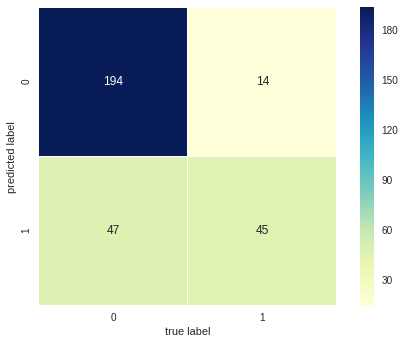

Accuracy on training set: 0.961
Accuracy on test set: 0.797


In [173]:
optimal_cat = grid_search4.best_estimator_
y_true, y_pred = y_test, optimal_cat.predict(X_test.values)
print(classification_report(y_true, y_pred))

mat = confusion_matrix(y_true, y_pred, labels=[1,0])

sns.heatmap(mat, square=True, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

print("Accuracy on training set: {:.3f}".format(optimal_cat.score(X_train.values, y_train.values)))
print("Accuracy on test set: {:.3f}".format(optimal_cat.score(X_test.values, y_test.values)))

In [0]:
# save the model to disk
filename = '/content/gdrive/My Drive/Springboard/cat.sav'
pickle.dump(optimal_xgb, open(filename, 'wb'))

## LightGBM Classifier

In [175]:
import lightgbm as lgb


lg = lgb.LGBMClassifier(silent=False)
lg_params = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }

grid_search5 = GridSearchCV(lg, 
                            param_grid = lg_params,
                            cv = cross_validation, 
                            verbose=1,
                            n_jobs = -1)


grid_search5.fit(X_train.values, y_train.values)

print ("Best Score: {}".format(grid_search5.best_score_))
print ("Best params: {}".format(grid_search5.best_params_))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s


Best Score: 0.7396825396825397
Best params: {'learning_rate': 0.05, 'max_depth': 25, 'n_estimators': 200, 'num_leaves': 300}


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   13.8s finished


              precision    recall  f1-score   support

           0       0.79      0.52      0.63        92
           1       0.82      0.94      0.87       208

   micro avg       0.81      0.81      0.81       300
   macro avg       0.80      0.73      0.75       300
weighted avg       0.81      0.81      0.80       300



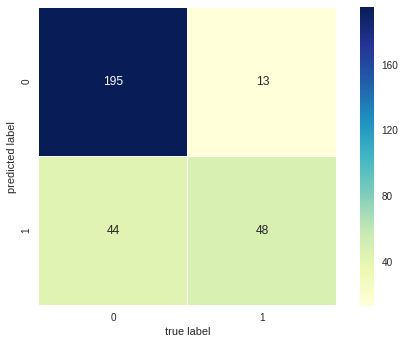

Accuracy on training set: 1.000
Accuracy on test set: 0.810


In [177]:
optimal_lg = grid_search5.best_estimator_
y_true, y_pred = y_test, optimal_lg.predict(X_test.values)
print(classification_report(y_true, y_pred))

mat = confusion_matrix(y_true, y_pred, labels=[1,0])

sns.heatmap(mat, square=True, annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

print("Accuracy on training set: {:.3f}".format(optimal_lg.score(X_train.values, y_train.values)))
print("Accuracy on test set: {:.3f}".format(optimal_lg.score(X_test.values, y_test.values)))

In [0]:
# save the model to disk
filename = '/content/gdrive/My Drive/Springboard/lg.sav'
pickle.dump(optimal_xgb, open(filename, 'wb'))

In [0]:
models = [optimized_clf, optimal_rf, optimal_xgb, optimal_cat, optimal_lg]
scores = []
model_names = ['decision_tree','random_forest','xgboost','catboost','lightgbm']

for model in models:
  scores.append(model.score(X_test.values, y_test.values))

In [185]:
pd.DataFrame({
    'model': model_names,
    'accuracy': scores
})

,model,accuracy
0,decision_tree,0.720000
1,random_forest,0.780000
2,xgboost,0.790000
3,catboost,0.796667
4,lightgbm,0.810000
